In [1]:
import pandas as pd
import json

# read json file
with open('data.json', encoding="utf8") as f:
    data = f.readlines()

In [2]:
json_read = json.loads(data[0])

In [3]:
json_read['abstract']

'We are looking for someone to focus purely on recruiting Permanent staff within a buoyant Early Childhood Educaton Sector.'

In [4]:
# further organise the json read into differnt list
id_list = []
content_list = []
classification_list = []
location_list = []
workType_list = []
abstract_list = []

for i in range(20000):
    json_read = json.loads(data[i])
    id_list.append(json_read['id'])
    abstract_list.append(json_read['abstract'])
    content_list.append(json_read['content'])
    classification_list.append(json_read['metadata']['classification']['name'])
    location_list.append(json_read['metadata']['location']['name'])
    workType_list.append(json_read['metadata']['workType']['name'])

In [5]:
#imports the stop words from nltk library

import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords 
"""e.g. 'and' 'a' 'the' """
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#lower case
def filter_nontext(string):
    string = re.sub('[^A-Za-z]', ' ', string)
    string = string.lower()
    return string

In [7]:
import pandas as pd

In [8]:
# turn data into pandas df
df = pd.DataFrame(list(zip(id_list, abstract_list, classification_list, location_list, workType_list)),
              columns=['id', 'abstract', 'classification', 'location', 'workType'])

In [9]:
df

,id,abstract,classification,location,workType
0,38915469,We are looking for someone to focus purely on ...,Education & Training,Sydney,Full Time
1,38934839,Passionate about exceptional customer service?...,Retail & Consumer Products,Melbourne,Casual/Vacation
2,38946054,Readifarians are known for discovering the lat...,Information & Communication Technology,Adelaide,Full Time
3,38833950,~ Rare opportunity for a Senior PM to step int...,Real Estate & Property,Melbourne,Full Time
4,38856271,Rare opportunity for an experienced Technology...,Information & Communication Technology,Auckland,Full Time
...,...,...,...,...,...
19995,38913636,In this role you will provide comprehensive ec...,Government & Defence,Auckland,Full Time
19996,38958228,Are you a VR GP looking for a tree-change? Mul...,Healthcare & Medical,Brisbane,Full Time
19997,38923409,EXCITING OPPORTUNITIES AHEAD: Telstra Chirnsid...,Retail & Consumer Products,Melbourne,Full Time
19998,38876716,We're looking for a highly motivated & skilled...,Hospitality & Tourism,Gold Coast,Full Time


In [10]:
#clear out the html element tags
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [11]:
df['abstract'] = df['abstract'].apply(lambda x: cleanhtml(str(x)))
df['abstract'] = df['abstract'].apply(lambda x: filter_nontext(str(x)))

In [12]:
df

,id,abstract,classification,location,workType
0,38915469,we are looking for someone to focus purely on ...,Education & Training,Sydney,Full Time
1,38934839,passionate about exceptional customer service ...,Retail & Consumer Products,Melbourne,Casual/Vacation
2,38946054,readifarians are known for discovering the lat...,Information & Communication Technology,Adelaide,Full Time
3,38833950,rare opportunity for a senior pm to step int...,Real Estate & Property,Melbourne,Full Time
4,38856271,rare opportunity for an experienced technology...,Information & Communication Technology,Auckland,Full Time
...,...,...,...,...,...
19995,38913636,in this role you will provide comprehensive ec...,Government & Defence,Auckland,Full Time
19996,38958228,are you a vr gp looking for a tree change mul...,Healthcare & Medical,Brisbane,Full Time
19997,38923409,exciting opportunities ahead telstra chirnsid...,Retail & Consumer Products,Melbourne,Full Time
19998,38876716,we re looking for a highly motivated skilled...,Hospitality & Tourism,Gold Coast,Full Time


In [13]:
df['abstract'] = df['abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
df

,id,abstract,classification,location,workType
0,38915469,looking someone focus purely recruiting perman...,Education & Training,Sydney,Full Time
1,38934839,passionate exceptional customer service excite...,Retail & Consumer Products,Melbourne,Casual/Vacation
2,38946054,readifarians known discovering latest greatest...,Information & Communication Technology,Adelaide,Full Time
3,38833950,rare opportunity senior pm step respected agen...,Real Estate & Property,Melbourne,Full Time
4,38856271,rare opportunity experienced technology manage...,Information & Communication Technology,Auckland,Full Time
...,...,...,...,...,...
19995,38913636,role provide comprehensive ecological wraparou...,Government & Defence,Auckland,Full Time
19996,38958228,vr gp looking tree change multiple opps ft pt ...,Healthcare & Medical,Brisbane,Full Time
19997,38923409,exciting opportunities ahead telstra chirnside...,Retail & Consumer Products,Melbourne,Full Time
19998,38876716,looking highly motivated skilled chef join kit...,Hospitality & Tourism,Gold Coast,Full Time


In [15]:
#lemmatize the word tokens
import nltk
nltk.download('wordnet')
nltk.stem.WordNetLemmatizer().lemmatize('word')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'word'

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [17]:
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [18]:
def checknull(text):
    if text == '':
        text = 'random string'
    return text

In [19]:
df['abstract'] = df['abstract'].apply(lambda x: lemmatize_text(str(x)))
df['abstract'] = df['abstract'].apply(lambda x: checknull(str(x)))

In [20]:
df

,id,abstract,classification,location,workType
0,38915469,looking someone focus purely recruiting perman...,Education & Training,Sydney,Full Time
1,38934839,passionate exceptional customer service excite...,Retail & Consumer Products,Melbourne,Casual/Vacation
2,38946054,readifarians known discovering latest greatest...,Information & Communication Technology,Adelaide,Full Time
3,38833950,rare opportunity senior pm step respected agen...,Real Estate & Property,Melbourne,Full Time
4,38856271,rare opportunity experienced technology manage...,Information & Communication Technology,Auckland,Full Time
...,...,...,...,...,...
19995,38913636,role provide comprehensive ecological wraparou...,Government & Defence,Auckland,Full Time
19996,38958228,vr gp looking tree change multiple opps ft pt ...,Healthcare & Medical,Brisbane,Full Time
19997,38923409,exciting opportunity ahead telstra chirnside p...,Retail & Consumer Products,Melbourne,Full Time
19998,38876716,looking highly motivated skilled chef join kit...,Hospitality & Tourism,Gold Coast,Full Time


### TF-IDF EMBEDDING

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
#vectorise the abstract column

v = TfidfVectorizer()
x = v.fit_transform(df['abstract'])

In [24]:
from sklearn.decomposition import TruncatedSVD

In [25]:
#truncate the dimension down
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(x)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [27]:
#insert the embeddings to df
df['emb'] = pd.Series(x.toarray().tolist(), index=df.index)

In [28]:
df

,id,abstract,classification,location,workType,emb
0,38915469,looking someone focus purely recruiting perman...,Education & Training,Sydney,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,38934839,passionate exceptional customer service excite...,Retail & Consumer Products,Melbourne,Casual/Vacation,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,38946054,readifarians known discovering latest greatest...,Information & Communication Technology,Adelaide,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,38833950,rare opportunity senior pm step respected agen...,Real Estate & Property,Melbourne,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,38856271,rare opportunity experienced technology manage...,Information & Communication Technology,Auckland,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
19995,38913636,role provide comprehensive ecological wraparou...,Government & Defence,Auckland,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19996,38958228,vr gp looking tree change multiple opps ft pt ...,Healthcare & Medical,Brisbane,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19997,38923409,exciting opportunity ahead telstra chirnside p...,Retail & Consumer Products,Melbourne,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19998,38876716,looking highly motivated skilled chef join kit...,Hospitality & Tourism,Gold Coast,Full Time,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [52]:
import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    print(np.average(corr))
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")
    

0.11704724972335306


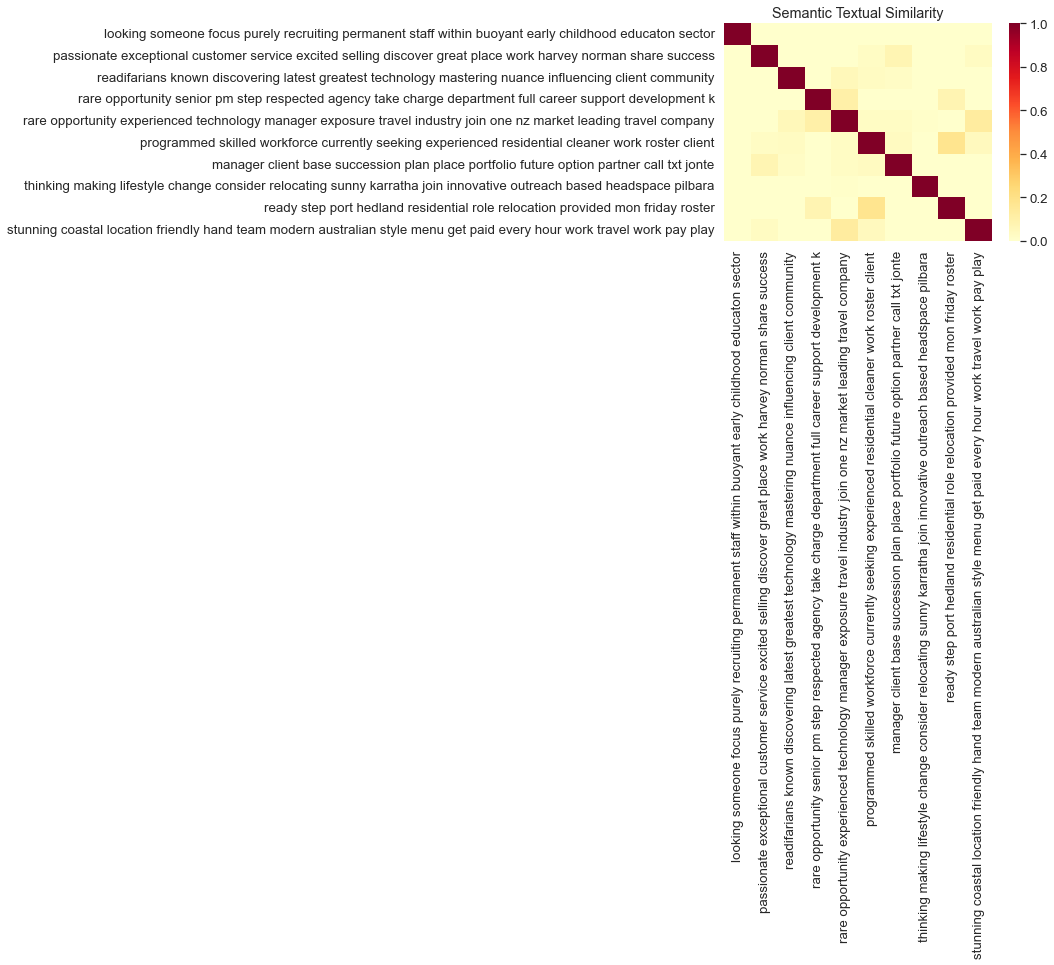

In [53]:
plot_similarity(df[:10]['abstract'].to_list(), df[:10]['emb'].to_list(), 90)

In [54]:
accounting = df[df['classification'] == 'Accounting']
accounting_abstract = accounting['abstract'].to_list()
accounting_emb = accounting['emb'].to_list()

0.134740156011202


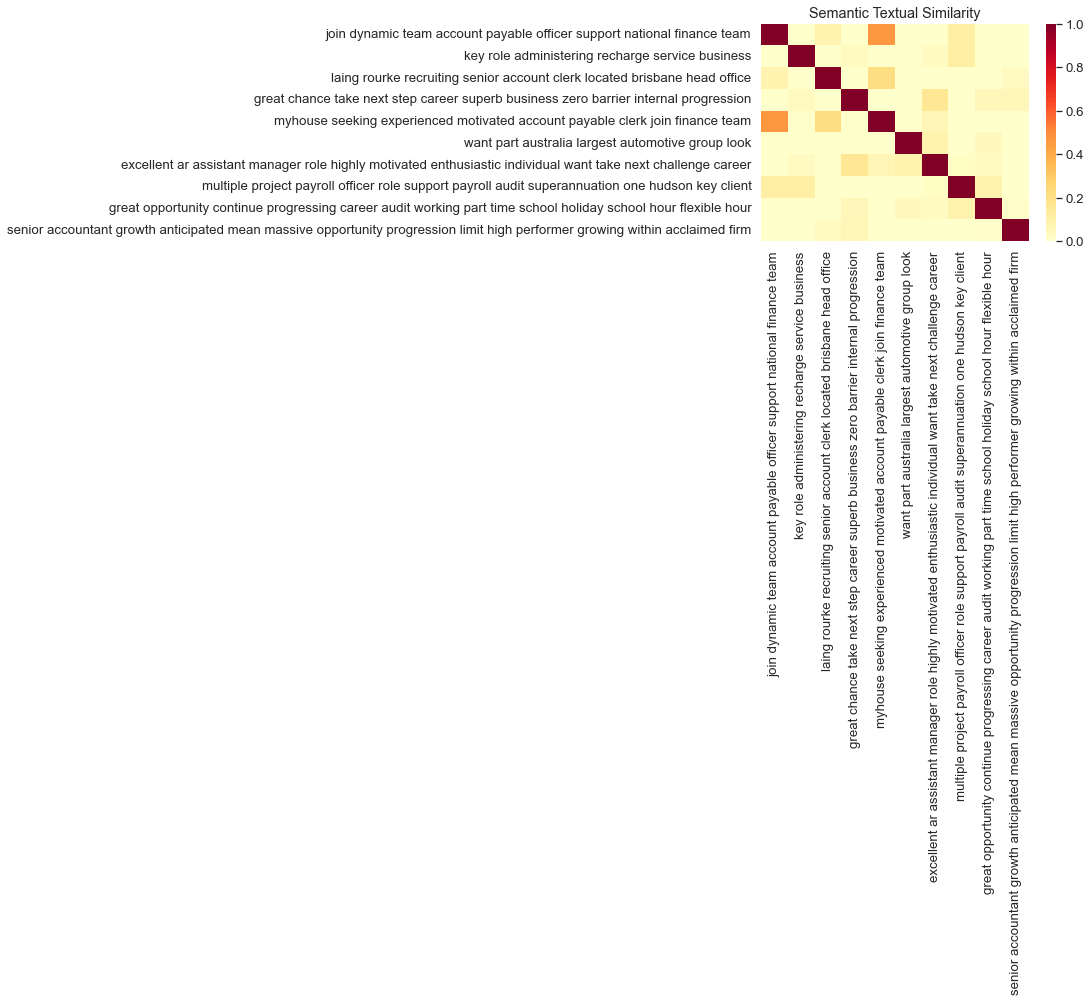

In [55]:
plot_similarity(accounting_abstract[25:35], accounting_emb[25:35], 90)

In [56]:
BFS = df[df['classification'] == 'Real Estate & Property']
BFS_abstract = BFS['abstract'].to_list()
BFS_emb = BFS['emb'].to_list()

0.13917922403762834


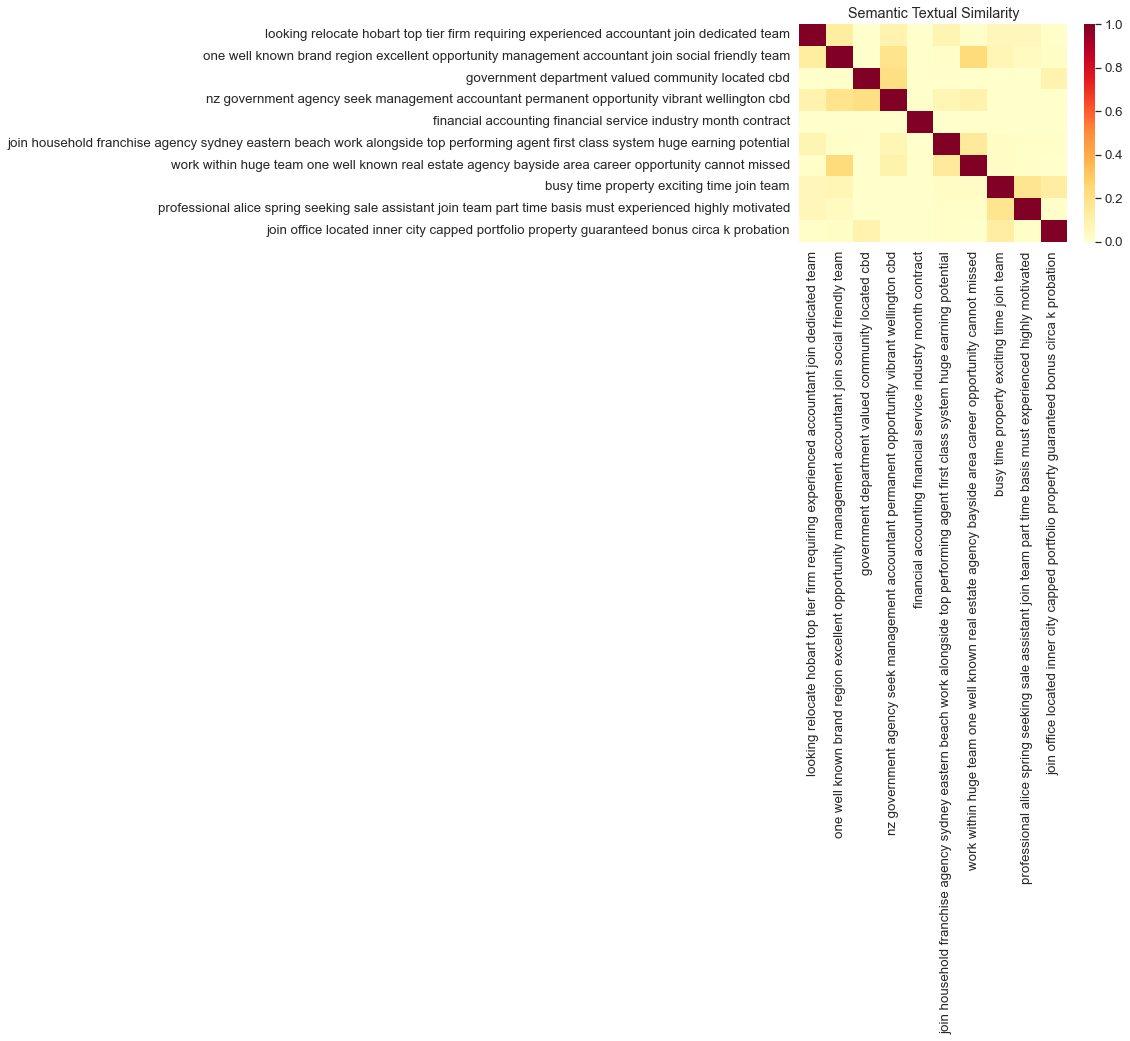

In [57]:
plot_similarity(accounting_abstract[10:15]+BFS_abstract[25:30], accounting_emb[10:15]+BFS_emb[25:30], 90)